# End to End demonstration

This notebook is intended to demonstrate the prolog/yap solver in action apllying for an existing puzzle or to a new random one.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from shapely.wkt import loads as wkt_loads

from setup_env.setup_db import setup_db
from utils.plot import plot_geometry, plot_solutions
from utils.db import connect_db
from utils.solver import run_yap_solver
from utils.puzzles import puzzle_generator

In [12]:
# setups a new environment for the application to run
setup_db()

✅ Database disponibile!
✅ Database schemas created successfully!
✅ Tetrominoes inserted successfully!
✅ Puzzle examples inserted successfully!
✅ Example solutions uploaded successfully!
✅ Database setup completed.


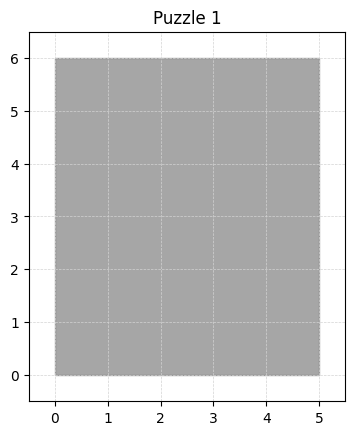

In [13]:
%matplotlib inline
## show initial example puzzle and example solution

conn = connect_db()
cur = conn.cursor()

query_puzzle = """
SELECT 
    id
    , name
    , ST_AsText(geom) 
FROM puzzles
WHERE id = 1; 
"""

cur.execute(query_puzzle)
puzzle = cur.fetchall()
geom=puzzle[0][2]
cur.close()
conn.close()

fig, ax = plt.subplots()
plot_geometry(ax=ax,geom=geom, color="gray",title="Puzzle 1")
plt.show()

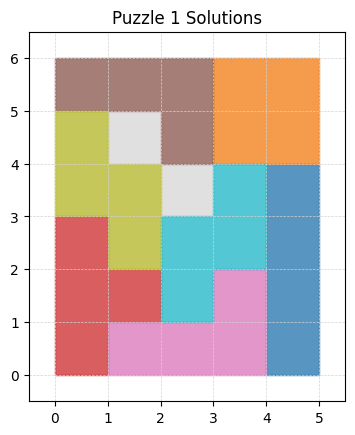

In [14]:
## Show theoretical solution for puzzle 1. This one was created manually

fig1, ax1 = plt.subplots()
plot_solutions(ax=ax1, puzzle_id=1, title="Puzzle 1 Solutions", solution_id=1 )
plt.show()

In [15]:
# Running yap solver on know puzzle

run_yap_solver(puzzle_id=1)

Executing YAP command: yap -l /workspaces/project_tadb_fcup_20242025/solver/solver_app.pl -g test_solver(1), halt.
YAP script for puzzle 1 executed successfully.
STDOUT:
>>> init_my_lib called
>>> YAP_UserCPredicate transpose_geometry called
>>> YAP_UserCPredicate disjoint_geometry called
>>> YAP_UserCPredicate within_geometry called
>>> YAP_UserCPredicate - union_geometry called
>>> YAP_UserCPredicate - load_tetrominoes_list called
>>> YAP_UserCPredicate - load_puzzle called
>>> YAP_UserCPredicate - save_solution called
>>> init_my_lib ended
Loading solver.pl...
****** Loaded solver.pl successfully ******.
load_puzzle(1, P) returned: POLYGON((0 3,0 4,0 5,0 6,1 6,2 6,3 6,4 6,5 6,5 5,5 4,5 3,5 2,5 1,5 0,4 0,3 0,2 0,1 0,0 0,0 1,0 2,0 3))
[DEBUG_SOLVER] 🚀 Loading tetrominoes from DB...
[DEBUG_SOLVER] ✅ Loaded tetrominoes: [tetramino(I,1,POLYGON((0 1,1 1,2 1,3 1,4 1,4 0,3 0,2 0,1 0,0 0,0 1))),tetramino(I,2,POLYGON((0 0,0 1,0 2,0 3,0 4,1 4,1 3,1 2,1 1,1 0,0 0))),tetramino(O,1,POLYGON((0 1,0

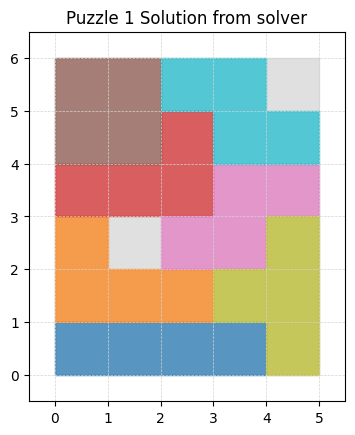

In [16]:
fig2, ax2 = plt.subplots()
plot_solutions(ax=ax2, puzzle_id=1, title="Puzzle 1 Solution from solver", solution_id=2 )
plt.show()

In [17]:
## And now for something completely different
## Can it solve if we generate a new puzzle?
## Lets find are 51 ...

puzzle_generator(puzzle_id=51, width=6, height=6, num_holes=4)

[<POLYGON ((1 2, 2 2, 2 3, 1 3, 1 2))>, <POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))>, <POLYGON ((4 1, 5 1, 5 2, 4 2, 4 1))>, <POLYGON ((3 5, 4 5, 4 6, 3 6, 3 5))>]
[<POLYGON ((1 0, 2 0, 2 1, 1 1, 1 0))>, <POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))>, <POLYGON ((3 0, 4 0, 4 1, 3 1, 3 0))>, <POLYGON ((4 0, 5 0, 5 1, 4 1, 4 0))>, <POLYGON ((5 0, 6 0, 6 1, 5 1, 5 0))>, <POLYGON ((0 1, 1 1, 1 2, 0 2, 0 1))>, <POLYGON ((1 1, 2 1, 2 2, 1 2, 1 1))>, <POLYGON ((2 1, 3 1, 3 2, 2 2, 2 1))>, <POLYGON ((3 1, 4 1, 4 2, 3 2, 3 1))>, <POLYGON ((5 1, 6 1, 6 2, 5 2, 5 1))>, <POLYGON ((0 2, 1 2, 1 3, 0 3, 0 2))>, <POLYGON ((2 2, 3 2, 3 3, 2 3, 2 2))>, <POLYGON ((3 2, 4 2, 4 3, 3 3, 3 2))>, <POLYGON ((4 2, 5 2, 5 3, 4 3, 4 2))>, <POLYGON ((5 2, 6 2, 6 3, 5 3, 5 2))>, <POLYGON ((0 3, 1 3, 1 4, 0 4, 0 3))>, <POLYGON ((1 3, 2 3, 2 4, 1 4, 1 3))>, <POLYGON ((2 3, 3 3, 3 4, 2 4, 2 3))>, <POLYGON ((3 3, 4 3, 4 4, 3 4, 3 3))>, <POLYGON ((4 3, 5 3, 5 4, 4 4, 4 3))>, <POLYGON ((5 3, 6 3, 6 4, 5 4, 5 3))>, <POLYGON ((0 4, 1 4, 1 

True

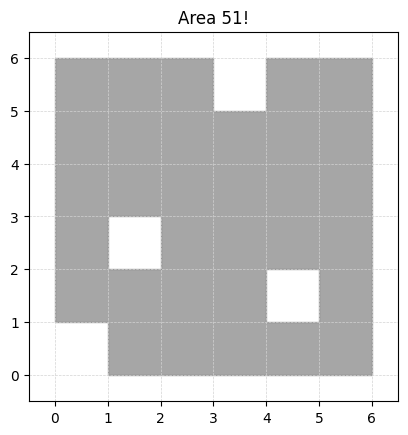

In [18]:
conn = connect_db()
cur = conn.cursor()

query_puzzle = """
SELECT 
    id
    , name
    , ST_AsText(geom) 
FROM puzzles
WHERE id = 51; 
"""

cur.execute(query_puzzle)
puzzle = cur.fetchall()
geom=puzzle[0][2]
cur.close()
conn.close()

fig, ax = plt.subplots()
plot_geometry(ax=ax,geom=geom, color="gray",title="Area 51!")
plt.show()

In [ ]:
# Running yap solver on know puzzle

run_yap_solver(puzzle_id=51)

Executing YAP command: yap -l /workspaces/project_tadb_fcup_20242025/solver/solver_app.pl -g test_solver(51), halt.


In [ ]:
## Hopefully it can solve this one too!

fig3, ax3 = plt.subplots()
plot_solutions(ax=ax3, puzzle_id=51, title="Area 51 Solution from solver", solution_id=1 )
plt.show()

## Next steps for refactoring

Due to lack of time some functions were not implemented and some code is not as clean as it should be. The next steps for refactoring are:

- Implement a 'fail safe' function when the solver does not find a solution.

- If the puzzle is too small or impossible to solve from the start (eg: 2x2 grid or 1x10 grid) the solver function shouln't even run the yap predicates and fail fast.

- Some functions are repeated or too long and should be refactored to be more readable and reusable.

- The solver was not tested agains puzzle of totaly separated polygons inside a multipolygon.